In [1]:
from datasetcontroller.datacontroller import DataController
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nnmodules.unet import Lstm2dUnet
from nnmodules.gan import DCGAN, DCGAN_v2
from glob import glob
import numpy as np

2023-06-14 14:51:37.953456: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-14 14:51:37.991969: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 데이터셋 폴더 경로 설정
path = os.path.join("/workspace")
data_path = os.path.join(path,'cmaqProjectdata')
# 컨트롤러
datacontroller = DataController(data_path = data_path)

train_tfr_path = glob(os.path.join(data_path,"dataset_record","train",'*.tfr'))
test_tfr_path = glob(os.path.join(data_path,"dataset_record","test",'*.tfr'))


/usr/local/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


67 82


/usr/local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3460: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
/workspace/repos/cmaqProject/experiment/datasetcontroller/datacontroller.py:55: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:5179 +type=crs
Right CRS: EPSG:5179

  joined = gpd.sjoin(ctp_rvn_gpd, grid_data.to_crs(5179), op='contains')


In [3]:
input_width = 12
target_width = 1
window_size = input_width + target_width
shift = 1
batch_size = 5
epoch = 3
INPUT_SHAPE = [input_width, 64, 64, 61]
OUTPUT_CHANNELS = 1

train_ds, train_dataset = datacontroller.get_window_dataset(train_tfr_path, window_size, shift, batch_size)
test_ds, test_dataset = datacontroller.get_window_dataset(test_tfr_path, window_size, shift, batch_size)

2023-06-14 14:51:45.648635: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22187 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:19:00.0, compute capability: 8.6
2023-06-14 14:51:45.649159: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 15435 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2023-06-14 14:51:45.649660: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22187 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:67:00.0, compute capability: 8.6
2023-06-14 14:51:45.650136: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22010 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

## LSTM 기반 피팅

In [4]:
net = Lstm2dUnet()
optimizer = tf.keras.optimizers.Adam(0.0001)
net.compile(optimizer=optimizer, loss = net.lose_mse)

In [5]:
# verbose, train call back check
history = net.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epoch,
)

Epoch 1/3


2023-05-30 11:59:07.426824: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inlstm2d_unet/upsample/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-30 11:59:18.019979: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 263 of 1000
2023-05-30 11:59:27.994783: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 532 of 1000
2023-05-30 11:59:38.015881: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 798 of 1000
2023-05-30 11:59:45.586271: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2023-05-30 11:59:46.358312: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-05-30 11:59:48.149311: I tensorflow/compiler/

   2927/Unknown - 240s 66ms/step - loss: 166.6270

2023-05-30 12:03:14.548877: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 266 of 1000
2023-05-30 12:03:24.547164: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 535 of 1000
2023-05-30 12:03:34.562568: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 803 of 1000
2023-05-30 12:03:41.884892: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


2927/2927 [==============================] - 307s 89ms/step - loss: 166.6270 - val_loss: 173.0239
Epoch 2/3
2927/2927 [==============================] - 230s 77ms/step - loss: 138.6367 - val_loss: 161.3413
Epoch 3/3
2927/2927 [==============================] - 230s 77ms/step - loss: 123.0123 - val_loss: 157.9473


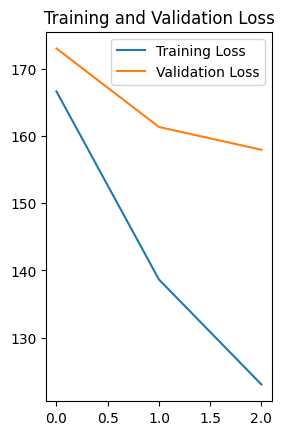

In [6]:
# 일단 val_set만 활용, 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
predictions = net.predict(test_ds)
print(predictions.shape)

1166/1166 [==============================] - 34s 23ms/step
(5826, 64, 64, 1)


2023-05-30 12:14:47.919424: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization


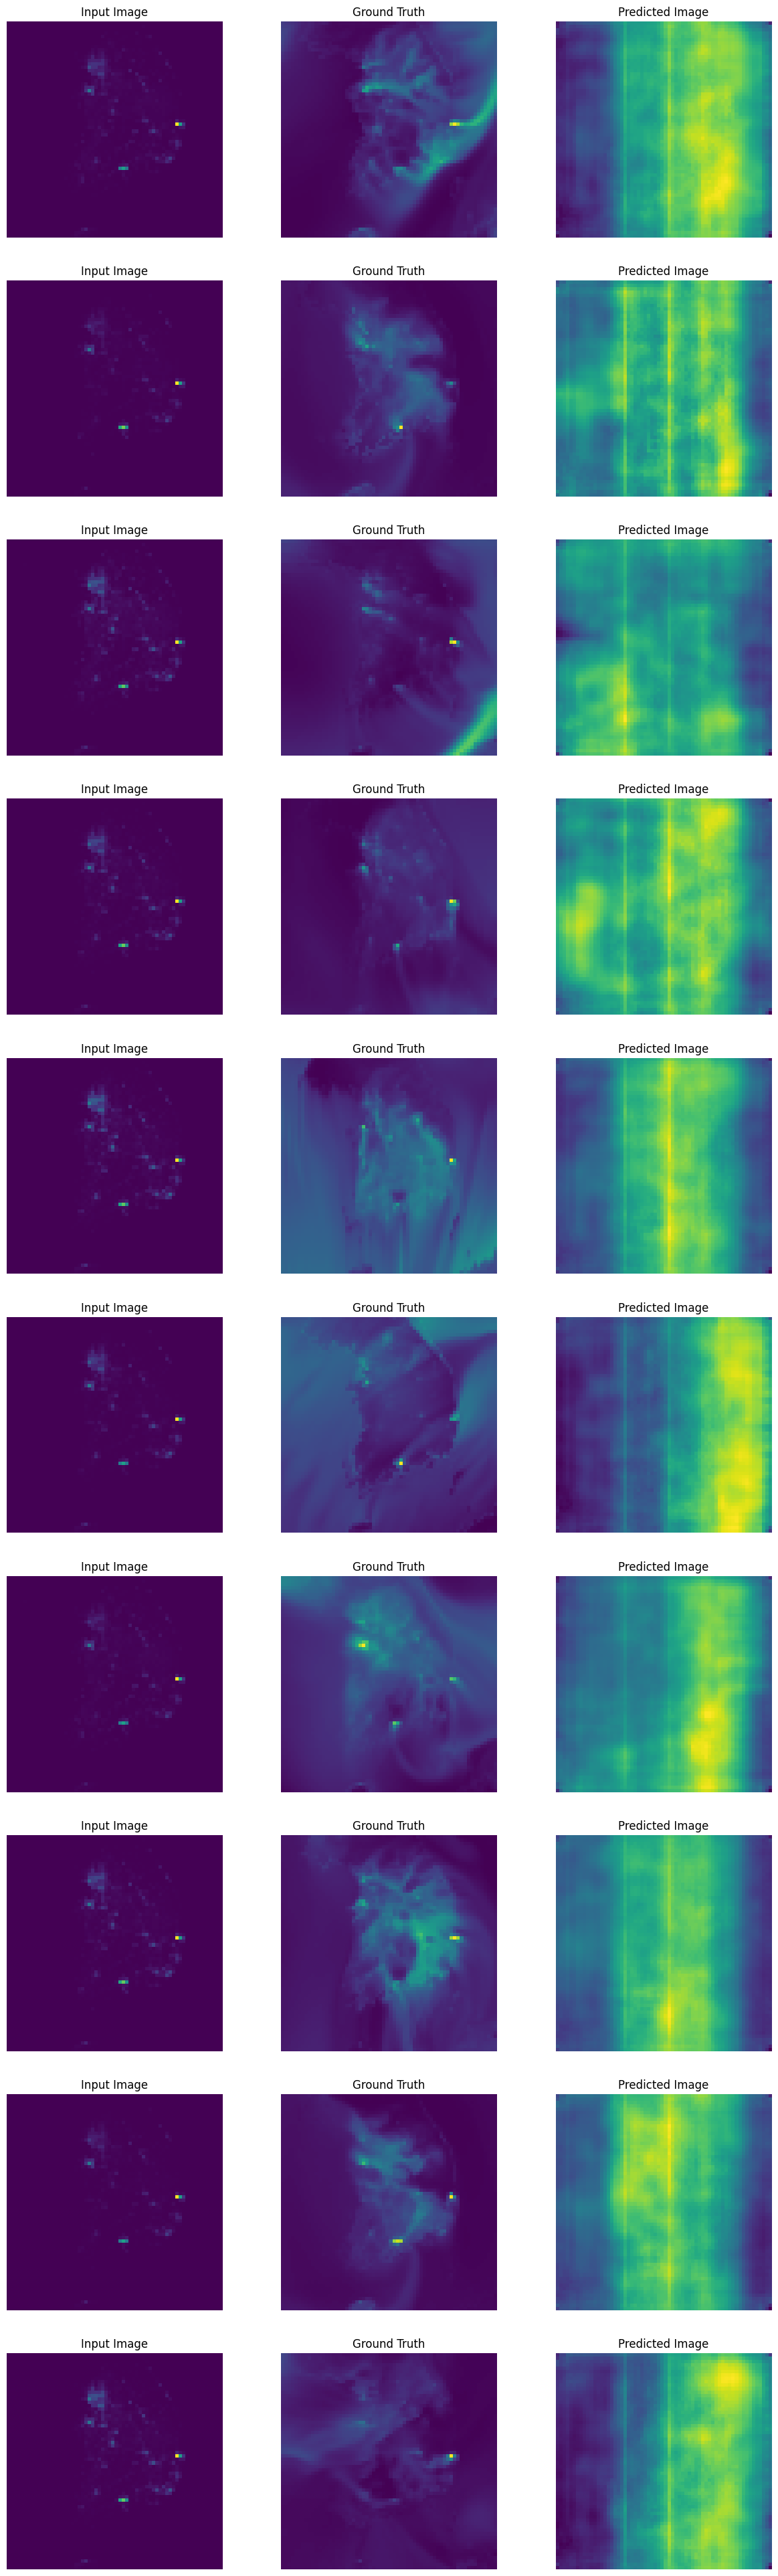

In [14]:
plt.figure(figsize=(15, 15*10))
j = 0
for step, (input_image, target) in test_ds.repeat().take(10).enumerate():
  prediction = net(input_image, training=True)
  
  display_list = [input_image[3][0][:,:,0][::-1], target[3][0,:,:,0][::-1], prediction[3][:,:,0][::-1]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
  
  for i in range(3):
    plt.subplot(30, 3, j + i + 1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i])
    plt.axis('off')
  j += 3

## GAN기반

In [4]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# 모델 체크포인트
proj_path = os.path.join(path,'repos','cmaqProject')
checkpoint_dir = os.path.join(proj_path,'models','training_checkpoints',"model_dcgan_hourly_1_checkpoint")
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

dcgan = DCGAN_v2(lambda_c = 100, input_shape_cus=INPUT_SHAPE, output_channels=OUTPUT_CHANNELS)
dcgan.compile()

steps = 50000

checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 dcgan = dcgan,
                                 )

####### 불러오기 ##########
# manager = tf.train.CheckpointManager(checkpoint, checkpoint_dir, max_to_keep=3)
# checkpoint.restore(manager.latest_checkpoint)

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name=None), name='conv_lstm2d_1/strided_slice_2:0', description="created by layer 'conv_lstm2d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 1), dtype=tf.float32, name='target_image'), name='target_image', description="created by layer 'target_image'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 2), dtype=tf.float32, name=None), name='concatenate_4/concat:0', description="created by layer 'concatenate_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 14, 14, 1), dtype=tf.float32, name=None), name='conv2d_8/BiasAdd:0', description="created by layer 'conv2d_8'")


In [5]:
# dcgan.generator
# dcgan.discriminator
tf.keras.utils.plot_model(dcgan.generator, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


2023-05-31 01:46:07.792429: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2023-05-31 01:46:17.826257: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 647 of 1000
2023-05-31 01:46:27.833712: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 917 of 1000
2023-05-31 01:46:30.901749: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.
2023-05-31 01:46:31.575859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101


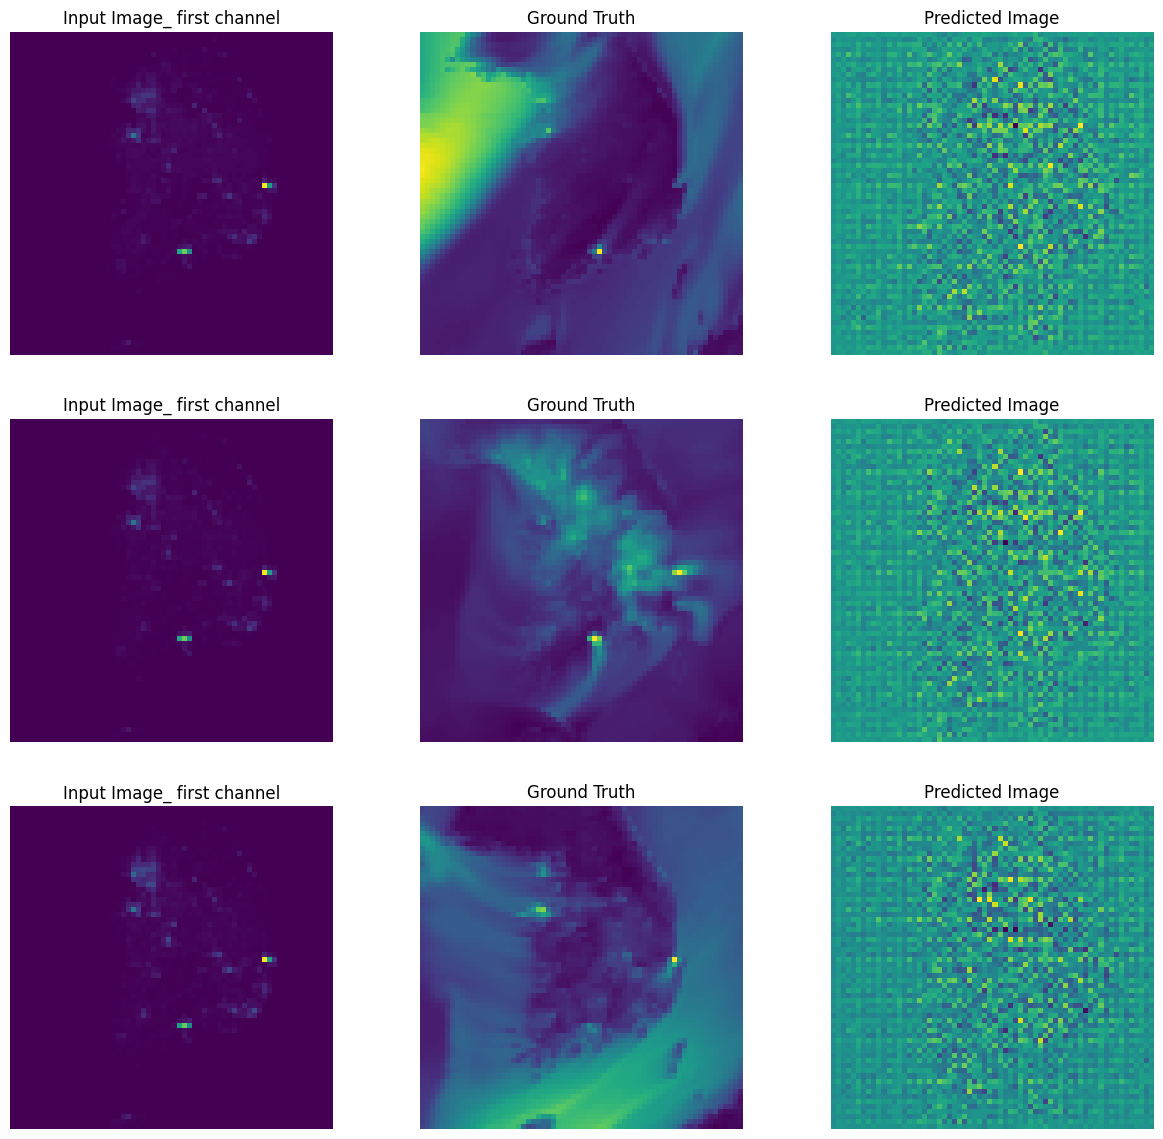

In [5]:
plt.figure(figsize=(15, 15*10))
j = 0
for step, (input_image, target) in test_ds.repeat().take(3).enumerate():
  prediction = dcgan(input_image, training=True)
  
  display_list = [input_image[3][0][:,:,0][::-1], target[3][0,:,:,0][::-1], prediction[3][:,:,0][::-1]]
  title = ['Input Image_ first channel', 'Ground Truth', 'Predicted Image']
  
  for i in range(3):
    plt.subplot(30, 3, j + i + 1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i])
    plt.axis('off')
  j += 3

2023-05-31 01:46:34.303126: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2023-05-31 01:46:44.371283: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 264 of 1000
2023-05-31 01:46:54.375064: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 535 of 1000
2023-05-31 01:47:04.366333: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 803 of 1000
2023-05-31 01:47:11.725848: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


Step: 0


2023-05-31 01:47:21.127211: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/sequential_5/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-31 01:47:22.786871: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x9e231350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-31 01:47:22.786898: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-05-31 01:47:22.786902: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-05-31 01:47:22.786905: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (2): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-05-31 01:47:22.786908: I tensorflow/compiler/xla/service/service.cc

..........Time taken for 200 steps: 0.11 sec

Step: 200
..........Time taken for 200 steps: 0.09 sec

Step: 400
..........Time taken for 200 steps: 0.12 sec

Step: 600
..........Time taken for 200 steps: 0.10 sec

Step: 800
..........Time taken for 200 steps: 1.57 sec

Step: 1000
..........Time taken for 200 steps: 0.12 sec

Step: 1200
..........Time taken for 200 steps: 0.10 sec

Step: 1400
..........Time taken for 200 steps: 0.09 sec

Step: 1600
..........Time taken for 200 steps: 0.12 sec

Step: 1800
..........Time taken for 200 steps: 1.48 sec

Step: 2000
..........Time taken for 200 steps: 0.10 sec

Step: 2200
..........Time taken for 200 steps: 0.14 sec

Step: 2400
....

2023-05-31 01:51:58.786950: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/sequential_5/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


......Time taken for 200 steps: 0.11 sec

Step: 2600
..........Time taken for 200 steps: 0.09 sec

Step: 2800
..........Time taken for 200 steps: 1.41 sec

Step: 3000
..........Time taken for 200 steps: 0.12 sec

Step: 3200
..........Time taken for 200 steps: 0.09 sec

Step: 3400
..........Time taken for 200 steps: 0.11 sec

Step: 3600
..........Time taken for 200 steps: 0.10 sec

Step: 3800
..........Time taken for 200 steps: 1.71 sec

Step: 4000
..........Time taken for 200 steps: 0.09 sec

Step: 4200
..........Time taken for 200 steps: 0.12 sec

Step: 4400
..........Time taken for 200 steps: 0.11 sec

Step: 4600
..........Time taken for 200 steps: 0.10 sec

Step: 4800
..........Time taken for 200 steps: 1.52 sec

Step: 5000
..........Time taken for 200 steps: 0.12 sec

Step: 5200
..........Time taken for 200 steps: 0.12 sec

Step: 5400
..........Time taken for 200 steps: 0.11 sec

Step: 5600
..........Time taken for 200 steps: 0.09 sec

Step: 5800
..........Time taken for 200 steps:

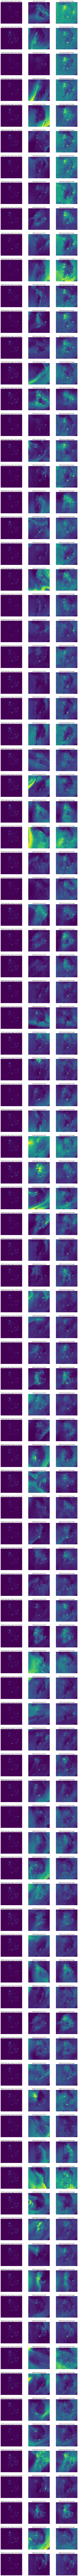

In [6]:
@tf.function
def train_step(input_image, target, step):
  
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = dcgan.generator(input_image, training=True)
   
    disc_real_output = dcgan.discriminator([input_image, target])
    disc_generated_output = dcgan.discriminator([input_image, gen_output])
   
    gen_total_loss = dcgan.generator_loss(disc_generated_output, gen_output, target)
    disc_loss = dcgan.discriminator_loss(disc_real_output, disc_generated_output)
   
  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          dcgan.generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               dcgan.discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          dcgan.generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              dcgan.discriminator.trainable_variables))

#   with summary_writer.as_default():
#     tf.summary.scalar('gen_total_loss', gen_total_loss, step=step)
#     tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step)
#     tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step)
#     tf.summary.scalar('disc_loss', disc_loss, step=step)
dcgan.train(train_ds, train_step, steps, checkpoint, checkpoint_prefix)

2023-05-31 03:17:06.079170: I tensorflow/core/grappler/optimizers/data/replicate_on_split.cc:32] Running replicate on split optimization
2023-05-31 03:17:16.134706: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 266 of 1000
2023-05-31 03:17:26.125542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 536 of 1000
2023-05-31 03:17:31.270611: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


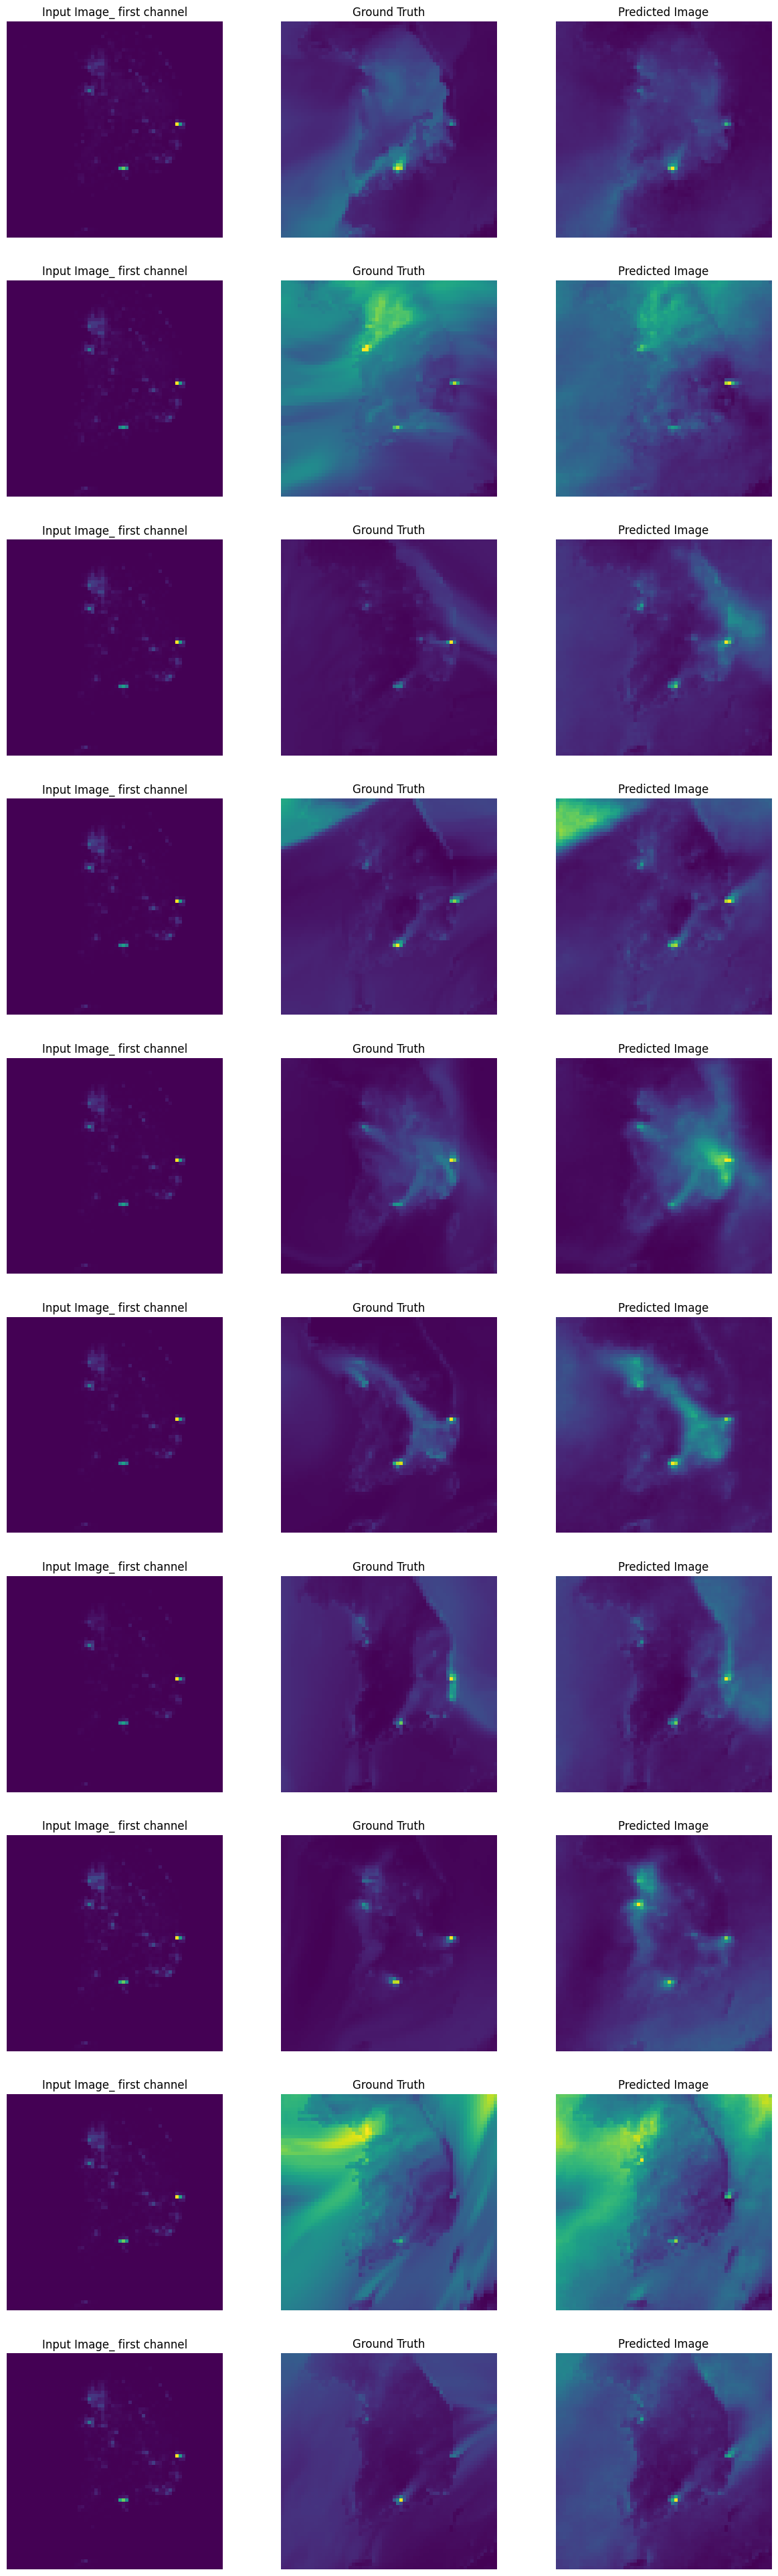

In [7]:
plt.figure(figsize=(15, 15*10))
j = 0
for step, (input_image, target) in test_ds.repeat().take(10).enumerate():
  prediction = dcgan(input_image, training=True)
  
  display_list = [input_image[3][0][:,:,0][::-1], target[3][0,:,:,0][::-1], prediction[3][:,:,0][::-1]]
  title = ['Input Image_ first channel', 'Ground Truth', 'Predicted Image']
  
  for i in range(3):
    plt.subplot(30, 3, j + i + 1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i])
    plt.axis('off')
  j += 3